In [1]:
import pandas as pd
import seaborn as sns
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
RESPONSE_PATH = "response.json"

with open(RESPONSE_PATH, 'r') as fp:
    response_data = json.load(fp)

In [43]:
df = pd.DataFrame(response_data['props'])

df['price_sqft'] = df['price'] / df['livingArea']
df['zip'] = df['address'].str.extract(" (9[0-9]+)")


df = df.drop(columns=["imgSrc", "zestimate", "detailUrl"]).copy()

In [46]:
single_family = (df.propertyType == 'SINGLE_FAMILY')
bedroom = (df.bedrooms == 4)
df[single_family & bedroom].sort_values(['price'])

,dateSold,propertyType,lotAreaValue,address,variableData,priceChange,price,bedrooms,contingentListingType,longitude,latitude,listingStatus,zpid,listingSubType,rentZestimate,daysOnZillow,bathrooms,livingArea,country,currency,lotAreaUnit,hasImage,unit,newConstructionType,price_sqft,zip
12,None,SINGLE_FAMILY,0.413223,"15723 Halinor St, Hesperia, CA 92345",None,NaN,395000,4.0,None,-117.319690,34.376026,FOR_SALE,17432156,{'is_FSBA': True},2463.0,29,2.0,1400.0,USA,USD,acres,True,NaN,NaN,282.142857,92345
28,None,SINGLE_FAMILY,7500.000000,"9052 Powell Ave, Hesperia, CA 92344","{'text': '$44,999 (Nov 29)', 'type': 'PRICE_RE...",-44999.0,435000,4.0,None,-117.352970,34.414646,FOR_SALE,64770057,{'is_FSBA': True},2314.0,93,2.0,1859.0,USA,USD,sqft,True,NaN,NaN,233.996772,92344
5,None,SINGLE_FAMILY,0.561616,"17901 Chestnut St, Hesperia, CA 92345","{'text': '$14,900 (Dec 12)', 'type': 'PRICE_RE...",-14900.0,460000,4.0,None,-117.272630,34.421963,FOR_SALE,17445484,{'is_FSBA': True},2569.0,111,2.0,2154.0,USA,USD,acres,True,NaN,NaN,213.556175,92345
1,None,SINGLE_FAMILY,1.000000,"15020 Joshua St, Hesperia, CA 92345",None,NaN,469000,4.0,None,-117.335710,34.403282,FOR_SALE,17443692,{'is_FSBA': True},2600.0,133,2.0,2141.0,USA,USD,acres,True,NaN,NaN,219.056516,92345
21,None,SINGLE_FAMILY,1.370000,"17625 Linden St, Hesperia, CA 92345","{'text': 'Open: Sun. 10am-2pm', 'type': 'OPEN_...",NaN,469900,4.0,None,-117.278810,34.431090,FOR_SALE,17444922,"{'is_FSBA': True, 'is_openHouse': True}",2550.0,7,2.0,1910.0,USA,USD,acres,True,NaN,NaN,246.020942,92345
17,None,SINGLE_FAMILY,2.000000,"11730 Duxbury Rd, Oak Hills, CA 92344",None,NaN,475000,4.0,None,-117.406770,34.358250,FOR_SALE,17427783,{'is_FSBA': True},2755.0,30,2.0,2239.0,USA,USD,acres,True,NaN,NaN,212.148280,92344
40,None,SINGLE_FAMILY,1.370000,"17620 Mojave St, Hesperia, CA 92345","{'text': '$20,000 (Nov 15)', 'type': 'PRICE_RE...",-20000.0,475000,4.0,None,-117.278750,34.434190,FOR_SALE,17444908,{'is_FSBA': True},2755.0,66,3.0,2950.0,USA,USD,acres,True,NaN,NaN,161.016949,92345
25,None,SINGLE_FAMILY,1.067500,"16556 Lilac St, Hesperia, CA 92345","{'text': 'Open: Sat. 10am-2pm', 'type': 'OPEN_...",NaN,499000,4.0,None,-117.302170,34.451225,FOR_SALE,17451339,"{'is_FSBA': True, 'is_openHouse': True}",2659.0,1,3.0,2540.0,USA,USD,acres,True,NaN,NaN,196.456693,92345
18,None,SINGLE_FAMILY,7214.000000,"14166 Cornell Ct, Hesperia, CA 92344",None,10000.0,500000,4.0,None,-117.353455,34.392944,FOR_SALE,2063470207,{'is_FSBA': True},2995.0,164,3.0,2356.0,USA,USD,sqft,True,NaN,NaN,212.224109,92344
2,None,SINGLE_FAMILY,1.330005,"9081 Pinon Ave, Hesperia, CA 92345",None,NaN,595000,4.0,None,-117.331110,34.415840,FOR_SALE,17443423,{'is_FSBA': True},2685.0,0,3.0,2694.0,USA,USD,acres,True,NaN,NaN,220.861173,92345


<AxesSubplot:xlabel='livingArea', ylabel='price'>

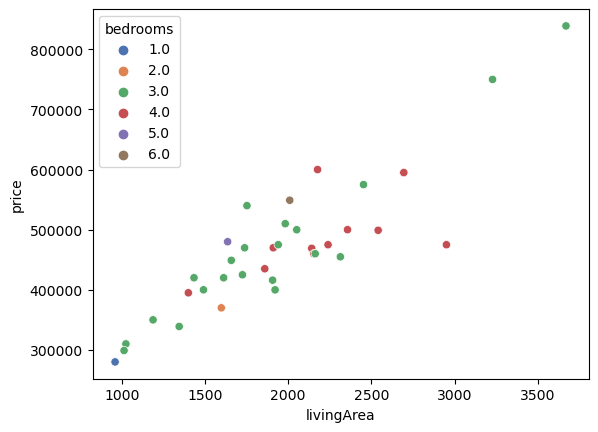

In [47]:
sns.scatterplot(data=df[single_family], x='livingArea', y='price', hue ='bedrooms', palette="deep")

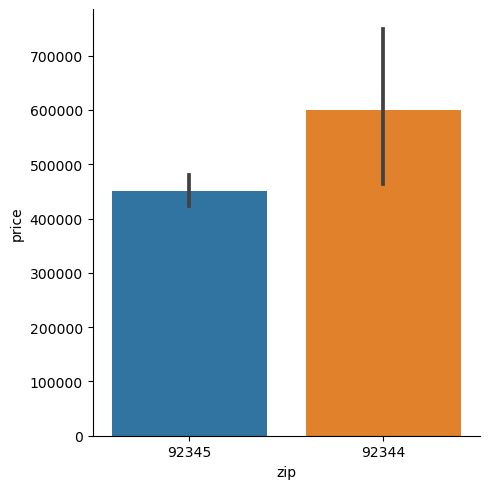

In [34]:
sns.catplot(data=df[single_family], kind='bar', x='zip', y='price')